In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv("./heart.csv")

In [3]:
df.drop(axis="rows", labels=df.index[df.duplicated()], inplace=True)
df.duplicated().sum()

0

In [4]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


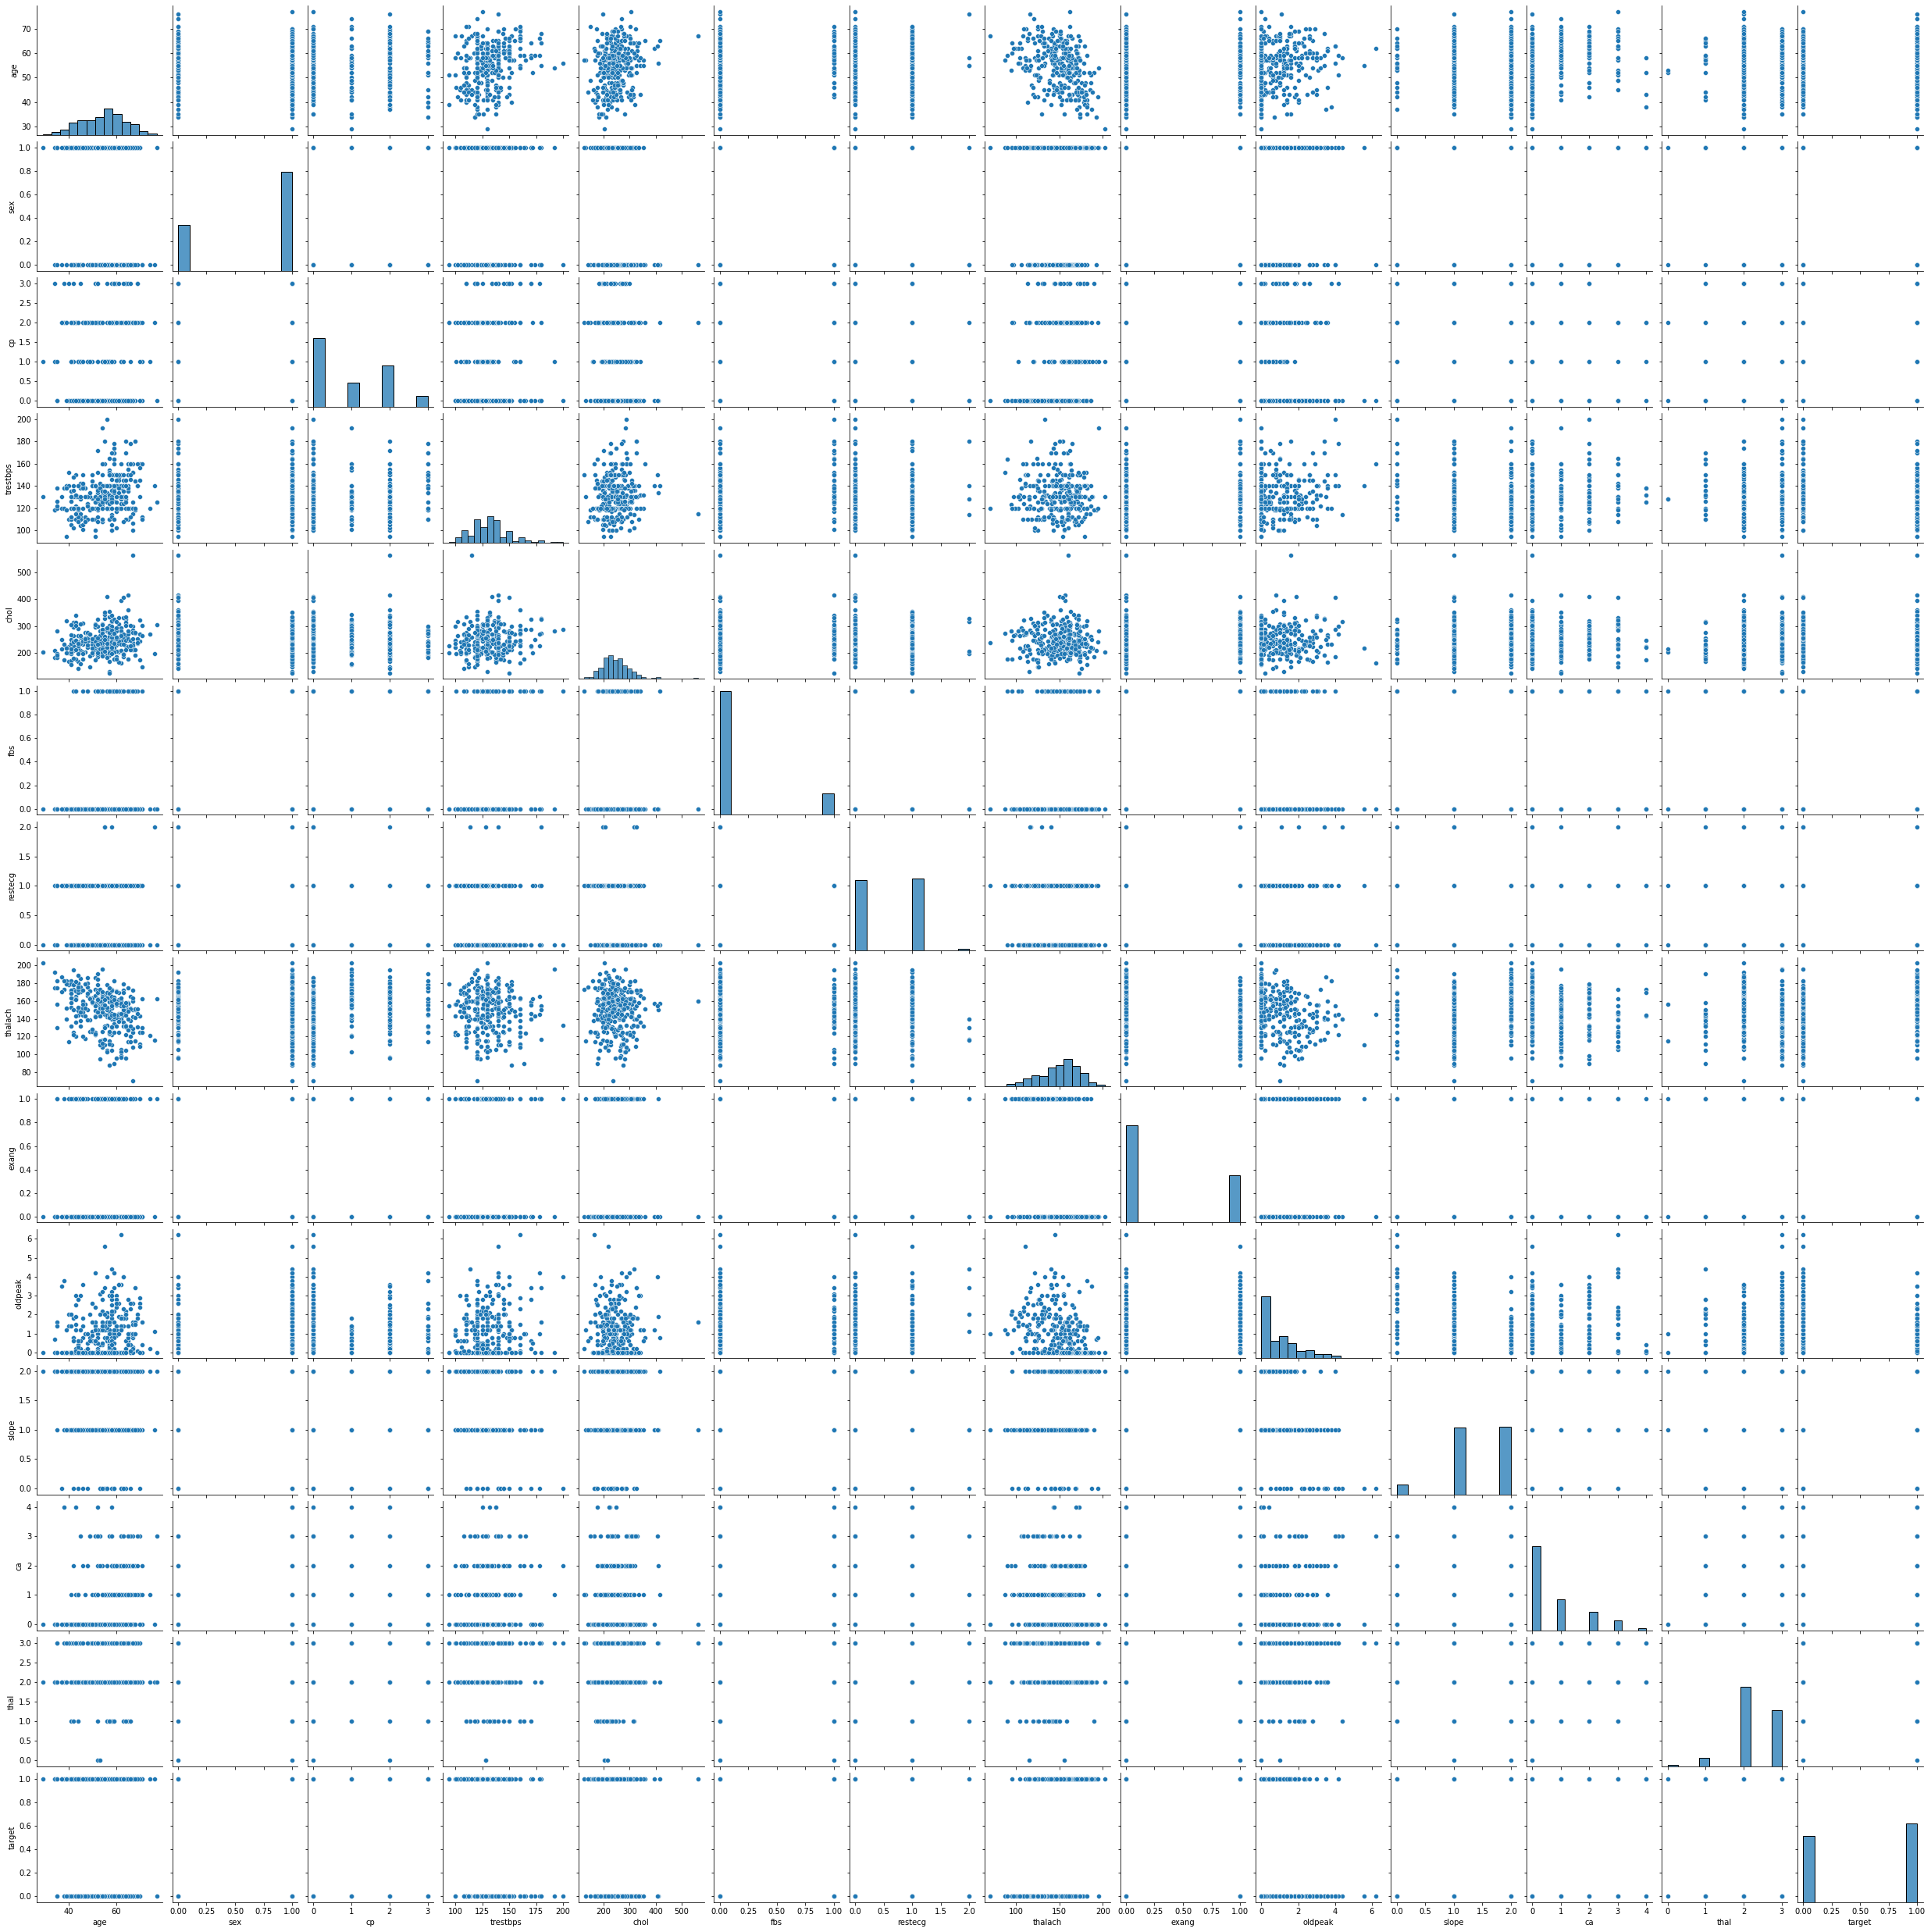

In [23]:
sns.pairplot(df)

In [24]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  ta

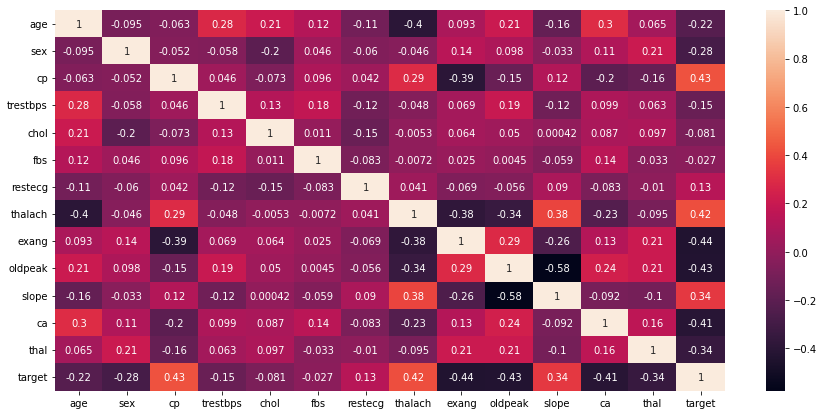

In [6]:
plt.subplots(figsize=(15,7))              #Plotting heat maps
sns.heatmap(df.corr(),annot = True)

In [7]:
y = df.iloc[:, 13]
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [8]:
# dataFrame.drop(dataFrame.columns[[0]], inplace = True, axis = 1)
df.apply(pd.to_numeric, errors='ignore') # Entire data is changed into numeric to avoid errors due to strings, other data types
X = df.iloc[:,0:13]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [9]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

categorical_val.remove('target')


In [10]:



X = df.drop('target', axis=1)
y = df.target

Xtrain = X[:int(0.7 * len(X))]
Xtest = X[int(0.3 * len(X)):]
Ytrain = y[:int(0.7 * len(X))]
Ytest = y[int(0.3 * len(X)):]

In [11]:
def sig(u):
  return (1 + np.exp(-u))**(-1)

In [12]:
Xtrain.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [13]:
myu = 0.005
Train_Column = Xtrain.iloc[:,7]
Xmat_Training = np.zeros((Xtrain.shape[0], 2))
Xmat_Training[:,0] = Train_Column
Xmat_Training[:,1] = 1
Train_Column = Xtest.iloc[:,7]
Xmat_Test = np.zeros((Xtest.shape[0], 2))
Xmat_Test[:,1] = 1
Xmat_Test[:,0] = Train_Column



Weight = np.random.uniform(low = -2, high =2, size = 2)
for _ in range(3000):
  Prob_matx = sig(Xmat_Training @ Weight)
  Weight += myu * Xmat_Training.T @ (Ytrain - Prob_matx) 
train_pred_prob = np.array(sig(Xmat_Training @ Weight))
for i in range(len(train_pred_prob)):
  if(train_pred_prob[i] < 0.5):
    train_pred_prob[i] = 0  
  else:
    train_pred_prob[i] = 1  
print("Accuracy of Univariate Logistic Regression on training data is", metrics.accuracy_score(Ytrain, train_pred_prob)*100, "%")

test_pred_prob = np.array(sig(Xmat_Test @ Weight))
for i in range(len(test_pred_prob)):
  if(test_pred_prob[i] < 0.5):
    test_pred_prob[i] = 0  
  else:
    test_pred_prob[i] = 1
print("Accuracy of Univariate Logistic Regression on test data is", metrics.accuracy_score(Ytest, test_pred_prob)*100, "%")
print("f1_score:", f1_score(Ytrain,train_pred_prob))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Accuracy of Univariate Logistic Regression on training data is 53.55450236966824 %
Accuracy of Univariate Logistic Regression on test data is 57.54716981132076 %
f1_score: 0.6975308641975309


In [15]:
Train_Columns = Xtrain.iloc[:,0:13]
Train_Columns = Train_Columns
Train_Columns.insert(13, "ones", [1]*len(Xtrain), True)
Test_Columns = Xtest.iloc[:,0:13]
Test_Columns.insert(13, "ones", [1]*len(Xtest), True)
Test_Columns=Test_Columns
WeightM = np.random.uniform(low = -2, high =2, size = 14)
for _ in range(5000):
  WeightM += myu * Train_Columns.T @ (Ytrain - sig(Train_Columns @ WeightM))
train_pred_prob = np.array(sig(Train_Columns @ WeightM))
for i in range(len(train_pred_prob)):
  if(train_pred_prob[i] < 0.5): 
    train_pred_prob[i] = 0 
  else:
    train_pred_prob[i] = 1 
print('Accuracy of Multivariate Logistic Regression on training data is',metrics.accuracy_score(Ytrain, train_pred_prob)*100, "%")

test_pred_prob = np.array(sig(Test_Columns @ WeightM))
for i in range(len(test_pred_prob)):
  if(test_pred_prob[i] < 0.5):
    test_pred_prob[i] = 0
  else:
    test_pred_prob[i] = 1


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Accuracy of Multivariate Logistic Regression on training data is 62.55924170616114 %


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
def get_accuracy(y_exp,y_pred):
    
    n = len(y_exp)

    y_exp= y_exp.target

    misclassifications = 0
    for i in range(n):
      if y_pred[i] != y_exp[i]:
        misclassifications +=1

    accuracy = (1-(misclassifications/n))*100

    return accuracy

In [17]:

# print('Accuracy',get_accuracy(Ytest,test_pred_prob)*100, "%")


In [18]:
def F1(y_true, y_pred):
  True_Pos= np.sum(np.multiply([i==1 for i in y_pred], y_true))
  True_Neg = np.sum(np.multiply([i==0 for i in y_pred], [not(j) for j in y_true]))
  False_Pos = np.sum(np.multiply([i==1 for i in y_pred], [not(j) for j in y_true]))
  False_Neg = np.sum(np.multiply([i==0 for i in y_pred], y_true))
  if((True_Pos!=0 or False_Pos!=0) and (True_Pos!=0 or False_Neg!=0)):
    precision = True_Pos/(True_Pos+False_Pos)
    recall = True_Pos/(True_Pos+False_Neg)
    if precision != 0 and recall != 0:
      f1 = (2 * precision * recall) / (precision + recall)
    else:
      f1=0
  else:
    f1 = 0
  return f1

In [19]:
print('Accuracy of Multivriate Logistic Regression on testing data is', metrics.accuracy_score(Ytest, test_pred_prob)*100, "%")
print("f1_score:", f1_score(Ytrain,train_pred_prob))
print("f1_score",F1(Ytrain,train_pred_prob))

Accuracy of Multivriate Logistic Regression on testing data is 66.0377358490566 %
f1_score: 0.7322033898305086
f1_score 0.7322033898305086


In [20]:
np.shape(Xmat_Training)

(211, 2)

Naive Bayes


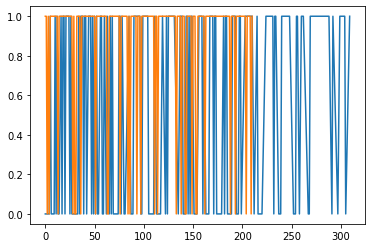

In [21]:
plt.plot(Ytrain)
plt.plot(train_pred_prob)